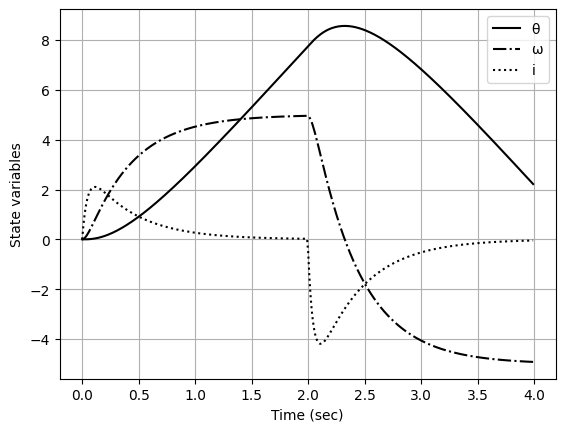

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.signal import lsim

# Define the system matrices
A = np.array([[0, 1, 0],
              [0, 0, 4.438],
              [0, -12, -24]])
b1 = np.array([[0], [0], [20]])
b2 = np.array([[0], [-7.396], [0]])
B = np.hstack((b1, b2))
C = np.array([[1, 0, 0], [0, 1, 0]])
D = np.array([[0], [0]])

# Create state-space system
DC_motor = control.ss(A, b1, C, D)  # Note only the first input is used

# Define the time vector
t = np.arange(0, 4.00, 0.01)
N = t.size

# Generate input u (simple way)
u_simple = np.zeros(N)
for i in range(N):
    if t[i] < 2:
        u_simple[i] = 3
    else:
        u_simple[i] = -3

# Generate input u (professional way)
u_prof = scipy.signal.square(2 * np.pi * t / 4)
u_prof = (+6 * u_prof) - 3
# Simulate the system with the simple input using lsim
t_out, y, x = lsim((A, b1, C, D), U=u_simple, T=t)

# Plot the result
plt.plot(t_out, x[:, 0], 'k', label='\u03B8')  # θ
plt.plot(t_out, x[:, 1], 'k-.', label='\u03C9')  # ω
plt.plot(t_out, x[:, 2], 'k:', label='i') # i
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()
